In [1]:
import json

loo_file = "./qa_err_raw_loo.jsonl"
prune_file = "./qa_err_raw_prune.jsonl"
reweight_file = "./qa_err_raw_reweight.jsonl"

with open(loo_file, "r") as f:
    loo_result = [json.loads(line) for line in f.readlines()]
with open(prune_file, "r") as f:
    prune_result = [json.loads(line) for line in f.readlines()]
with open(reweight_file, "r") as f:
    reweight_result = [json.loads(line) for line in f.readlines()]

In [2]:
acc_loo = [i["acc_loo"] for i in loo_result][:70]
acc_prune = [i["acc_prune"] for i in prune_result][:70]
acc_reweight = [i["acc_reweight"] for i in reweight_result][:70]
acc_vanilla = [i["acc_baseline"] for i in prune_result][:70]

In [3]:
save_file = "./raw_result.jsonl"
with open(save_file, "r") as f:
    raw_result = [json.loads(line) for line in f.readlines()]

import pandas as pd
raw_result_df = pd.DataFrame(raw_result)

num_relation = 70
relation = raw_result_df["relation"][:num_relation].tolist()
acc_davincii = raw_result_df["acc_davincii"][:num_relation].tolist()

[<matplotlib.lines.Line2D object at 0x2ac3e3e2ea70>, <matplotlib.patches.PathPatch object at 0x2ac3dcaee5c0>, <matplotlib.patches.PathPatch object at 0x2ac3dcaef640>, <matplotlib.patches.PathPatch object at 0x2ac3dca8c6d0>, <matplotlib.patches.PathPatch object at 0x2ac3dca8d720>] ['GPT-3.5', 'Vanilla', 'LOO', 'Reweight', 'Prune']


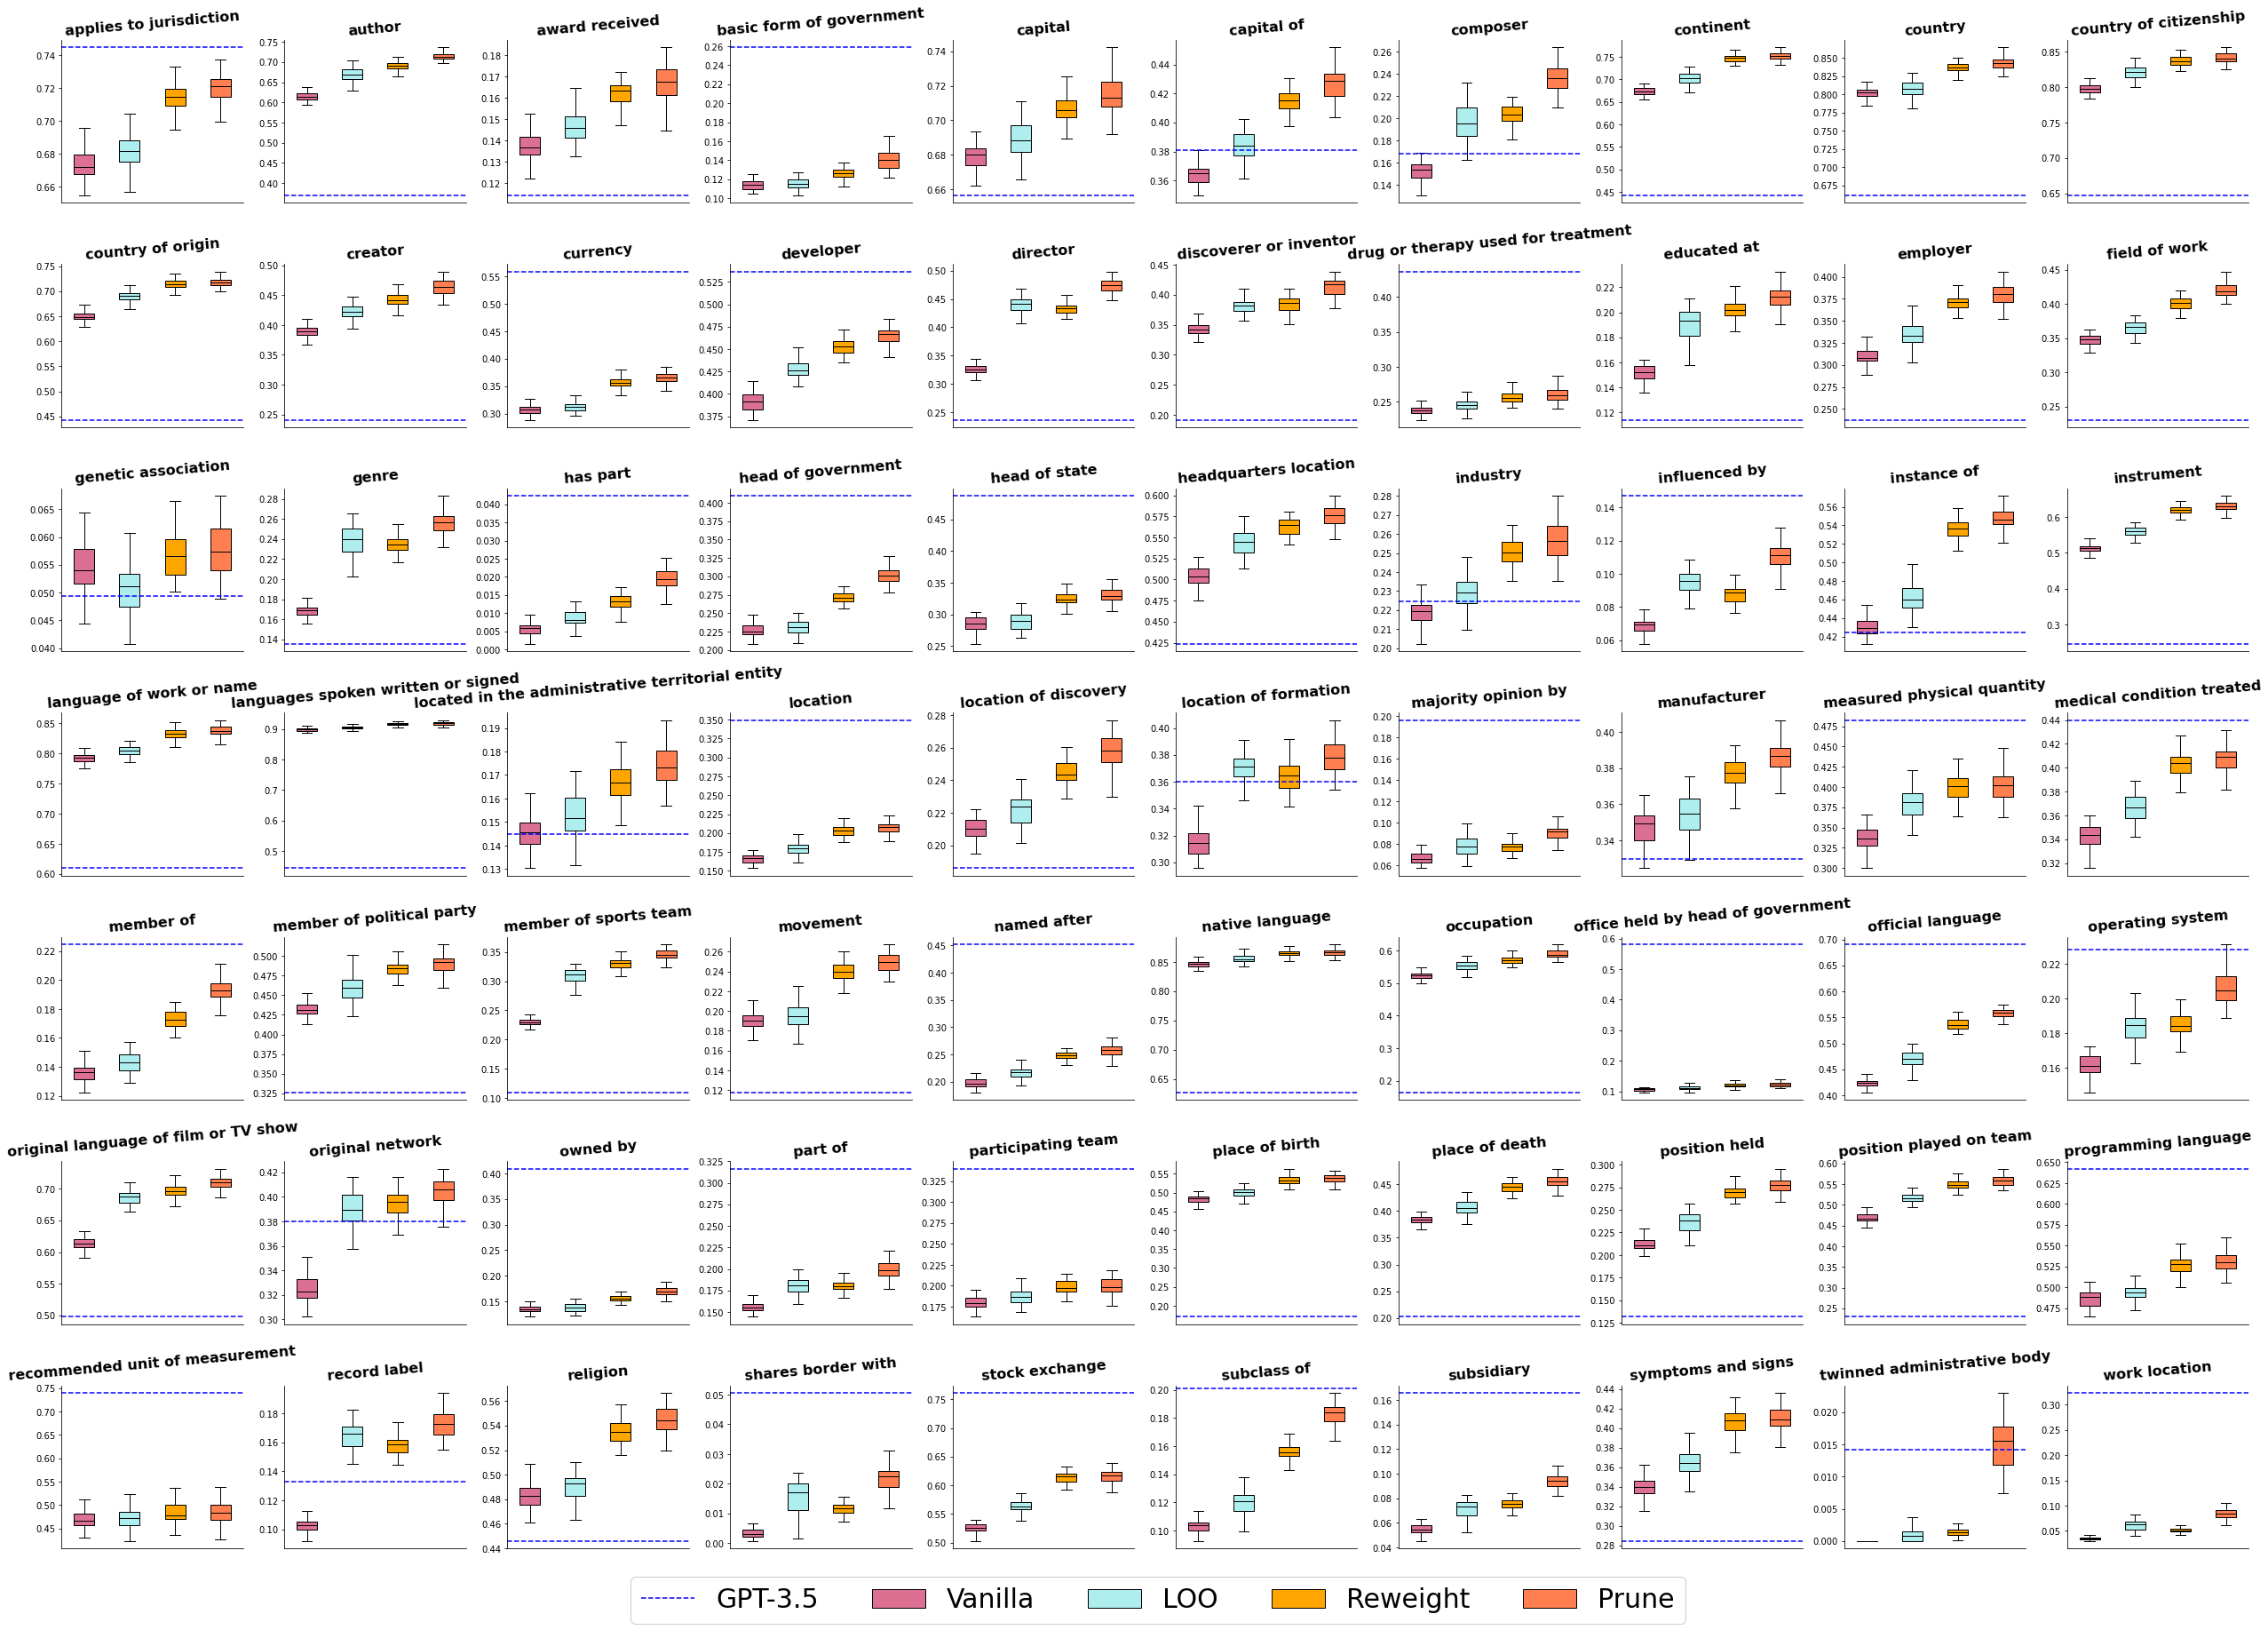

In [6]:
import matplotlib.pyplot as plt
import numpy as np


H = 7
W = 10
width = 3.5


# patterns = ['//', '\\\\', '', '//', "\\", '+', '\\\\', 'x', '++']
colors = ["palevioletred", "paleturquoise", "orange","coral"]

total_bplot = []

fig, axs = plt.subplots(H, W, figsize=(W * width, H * width))
for i in range(H):
    for j in range(W):
        index = i*W+j

        x = ["vanilla", "loo", "reweight", "prune"]
        y = [acc_vanilla[index], acc_loo[index], acc_reweight[index], acc_prune[index]]

        bplot = axs[i, j].boxplot(y, showfliers=False,medianprops=dict(color="black"), patch_artist=True)
        total_bplot = bplot
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        axs[i, j].set_xticks([])
        # axs[i, j].set(xticklabels= x)
        
        axs[i, j].set_title(relation[index].replace("_", " "), fontsize=16, rotation = 5, fontweight='bold')
        axs[i, j].axhline(y=acc_davincii[index], color='b', linestyle='--',label="GPT-3.5")
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)


lines, labels = axs[0, 0].get_legend_handles_labels()
lines.extend(total_bplot['boxes'])
labels.extend(["Vanilla", "LOO", "Reweight", "Prune"])
print(lines, labels)
fig.legend( lines, labels, bbox_to_anchor=(0.75, 0.0),ncol=5, framealpha=1, fontsize=30)


plt.tight_layout()
plt.savefig("results_err.pdf", format="pdf", bbox_inches="tight")
plt.show()